<a href="https://colab.research.google.com/github/viniciussz7/projeto_kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação e Análise do Algoritmo de K-means

##📚 Importando as principais bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

- **pandas 🐼**
- **matplotlib 🎨**
- **seaborn 📈**
- **scikit-learn 🛠️**
- **numpy 🔢**

In [78]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
%pip install matplotlib scikit-learn pandas seaborn scipy

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d

## 📁 Carregando o dataset

O dataset "Human Activity Recognition Using Smartphones" contém dados coletados por sensores de acelerômetro e giroscópio de smartphones de 30 voluntários enquanto realizavam atividades diárias.

- Foram selecionadas 6 AVDs: em pé, sentado, deitado, caminhando, descendo escadas e subindo escadas.

- Um total de 561 características (features) foram extraídas para descrever cada janela de atividade.

Para facilitar a avaliação de desempenho, o conjunto de dados também foi particionado aleatoriamente em dois conjuntos independentes, onde 70% dos dados foram selecionados para treinamento e os 30% restantes para teste.

Artigo:
[Artigo de experimento HAR Dataset](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf)

Dataset:
[Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

▶️ **Passo 1:** Baixar o arquivo zip e extrair os arquivos:

In [79]:
# Importar bibliotecas para baixar e extrair os arquivos
%pip install gdown
import gdown
import zipfile

# Baixar o arquivo zip da URL
url = "https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg"
output = "UCI_HAR_Dataset.zip"
gdown.download(url, output, quiet=False)

# Extrair o conteúdo do arquivo zip para a pasta atual
with zipfile.ZipFile(output, 'r') as zip_file:
  zip_file.extractall("UCI_HAR_Dataset")

Downloading...
From (original): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg
From (redirected): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg&confirm=t&uuid=4e7da53c-1335-4d2f-9f60-e082791a6077
To: /content/UCI_HAR_Dataset.zip
100%|██████████| 61.0M/61.0M [00:00<00:00, 168MB/s]


▶️ **Passo 2:** Carregar os dados X_train e X_test e as features:

In [80]:
# Carregar X_train e X_test usando pandas
X_train = pd.read_csv('UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv('UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
features = pd.read_csv('UCI_HAR_Dataset/UCI HAR Dataset/features.txt', sep='\s+', header=None, usecols=[1])

▶️ **Passo 3:** Nomear as colunas dos dados de treinamento:

In [114]:
# Definir as colunas de X_train usando as features
X_train.columns = features.values.ravel()
X_test.columns = features.values.ravel()

# Visualizar X_train
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## 🔎 Análise Exploratória dos dados


▶️ **Passo 1:** Verificar as dimensões do dataset e os tipos de dados. Isso nos dá uma visão geral inicial do dataset, como o número de linhas e colunas, e os tipos de dados de cada coluna.

In [82]:
print("Dimensões do dataset:", X_train.shape)
print("\nTipos de dados:\n", X_train.dtypes)

Dimensões do dataset: (7352, 561)

Tipos de dados:
 tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object


▶️ **Passo 2:** Calcular a matriz de correlação para ajudar a identificar features altamente correlacionadas, o que indica redundância.

In [83]:
# Calcular a matriz de correlação
correlation_matrix = X_train.corr()
print(correlation_matrix)



                                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.148061   
tBodyAcc-mean()-Y                              0.148061           1.000000   
tBodyAcc-mean()-Z                             -0.256952          -0.078769   
tBodyAcc-std()-X                               0.000619          -0.045160   
tBodyAcc-std()-Y                              -0.021903          -0.044920   
...                                                 ...                ...   
angle(tBodyGyroMean,gravityMean)               0.037444           0.017967   
angle(tBodyGyroJerkMean,gravityMean)           0.028844           0.075679   
angle(X,gravityMean)                          -0.035257          -0.005309   
angle(Y,gravityMean)                           0.034371           0.001053   
angle(Z,gravityMean)                           0.028242          -0.013903   

                                      tBodyAcc-mean()-Z  tBodyA

⚠️ **OBS:**

Com muitas variáveis, o heatmap da matriz de correlação ficaria difícil de interpretar, pois ficaria muito denso e com muitos quadrados pequenos.

Desta forma, vamos utilizar uma alternativa para visualizar a correlação de forma mais clara:
- Clustermap: combina um heatmap com um dendrograma, que mostra a hierarquia das variáveis com base em suas correlações.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

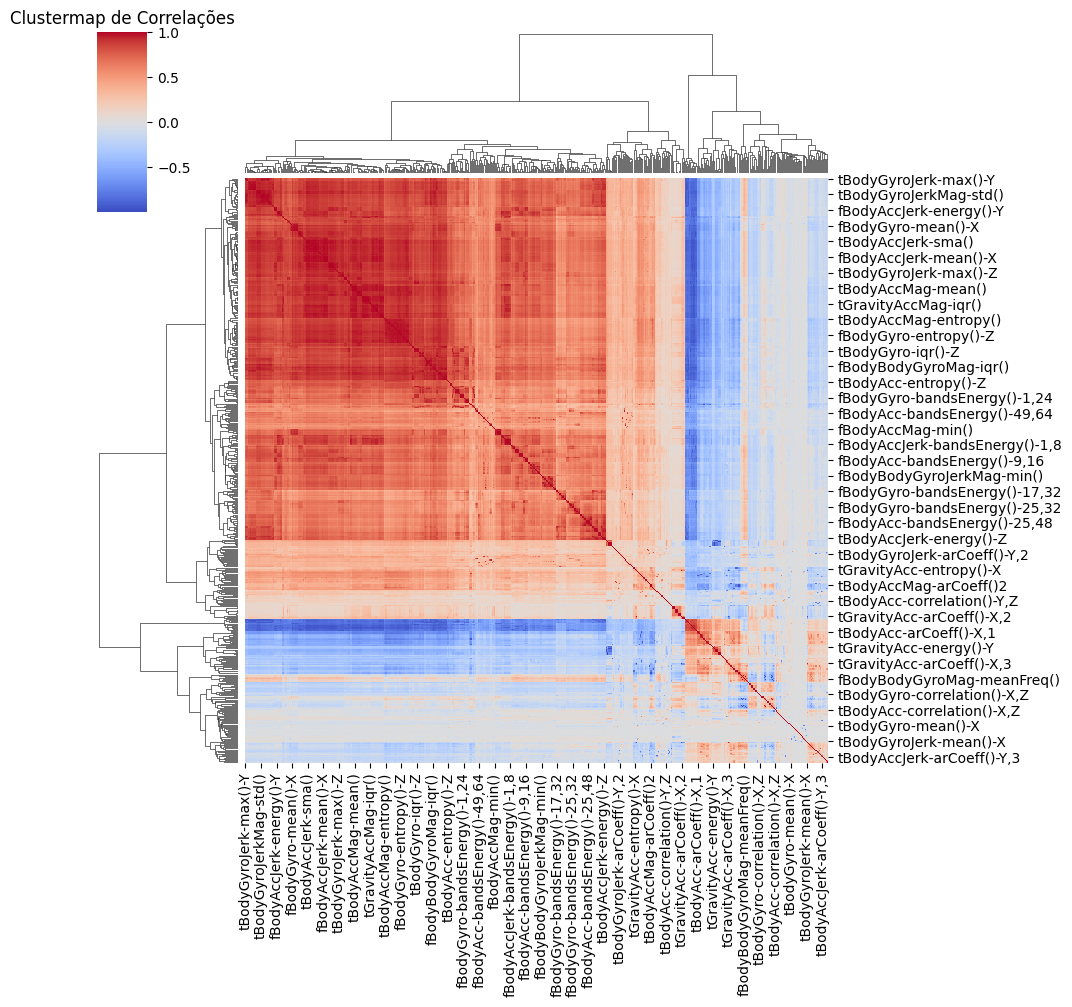

In [84]:
# Plotar o clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Clustermap de Correlações')
plt.show()

❗ Nota-se que a visualização ainda fica prejudicada, devido ao tanto de variáveis, porém pelas cores é possivel notar algumas correlações altas (vermelho e azul escuros).

▶️ **Passo 3:** Sendo assim, para facilitar ainda mais vamos reduzir a dimensionalidade dos dados usando o PCA, especificando que queremos reduzir a duas componentes.

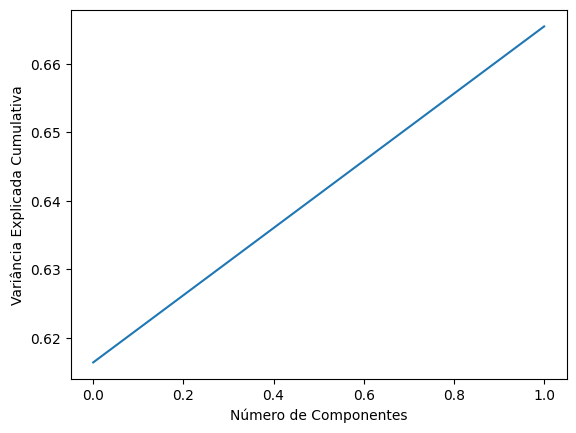

In [121]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  # Aplicar PCA aos dados de treino
X_test_pca = pca.fit_transform(X_test)  # Aplicar PCA aos dados de teste

# Mostrar a variância explicada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.show()

▶ Para analisar como os valores de cada componente principal, que é uma combinação linear das variáveis originais, estão distribuídos nos dados, vamos plotar o gráfico da distribuição e sua frequência.

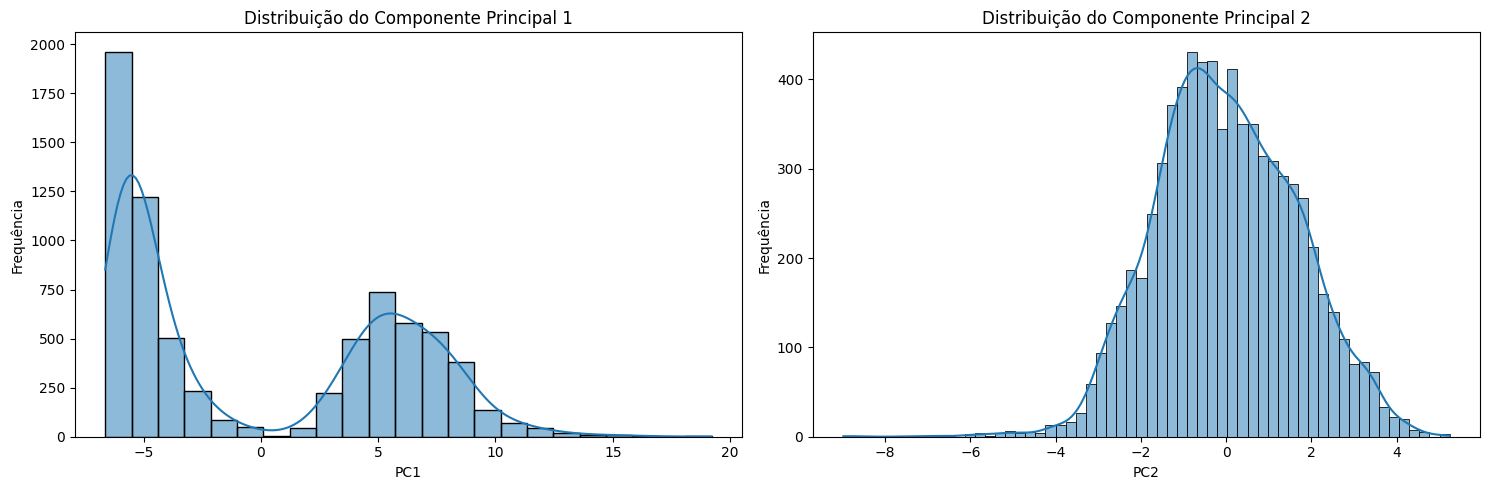

In [86]:
import math

num_components = pca.n_components_
num_rows = int(math.ceil(num_components / 3))  # Calcula o número de linhas para os subplots
num_cols = min(num_components, 3)              # Calcula o número de colunas (máximo 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i in range(num_components):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_components > 3 else axes[col]  # Ajuste para um único subplot se houver menos de 4 componentes

    sns.histplot(X_train_pca[:, i], kde=True, ax=ax)
    ax.set_title(f'Distribuição do Componente Principal {i+1}')
    ax.set_xlabel(f'PC{i+1}')
    ax.set_ylabel('Frequência')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Analisando os Componentes Principais:

▶ Com a distribuição dos componentes principais, percebemos que a componentes PC1 apresentou uma forma bimodal, o que pode indicar a presença de dois grupos distintos nos dados. Ao analisar os loadings desse componente, podemos identificar as variáveis originais que mais contribuem para essa separação em grupos.

▶ O PCA foi aplicado aos dados, e os loadings foram calculados para cada componente principal e cada variável original e são então armazenados no atributo n_components_ do objeto PCA.

▶ Para isso vamos examinar os loadings do PCA para PC1:

In [87]:
loadings = pca.components_

In [88]:
num_components = pca.n_components_
feature_names = X_train.columns  # Use os nomes das features do dataset

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(num_components)], index=feature_names)

pc1_loadings = loadings_df['PC1'].sort_values(ascending=False)  # Carregamentos do PC1 em ordem decrescente

print(pc1_loadings)

fBodyAccJerk-entropy()-X     0.125230
fBodyAccJerk-entropy()-Y     0.122470
tBodyAccJerkMag-entropy()    0.120568
fBodyAcc-entropy()-X         0.120216
fBodyAccMag-entropy()        0.113367
                               ...   
tBodyAccJerk-min()-Z        -0.048463
tBodyAcc-min()-Y            -0.055160
tBodyAccJerk-min()-Y        -0.056363
tBodyAcc-min()-X            -0.059094
tBodyAccJerk-min()-X        -0.069193
Name: PC1, Length: 561, dtype: float64


- **PC1** - Observando as variáveis com maiores loadings positivos, notamos que elas estão relacionadas à entropia dos sinais de aceleração do corpo e da aceleração do corpo durante um jerk (movimento brusco). Por outro lado, as variáveis com maiores loadings negativos estão relacionadas aos valores mínimos da aceleração do corpo e da aceleração do corpo durante um jerk. Podemos inferir que PC1 representa a complexidade ou irregularidade do movimento do corpo.


Vejamos a dispersão entre esses componentes:

Text(0, 0.5, 'PC2')

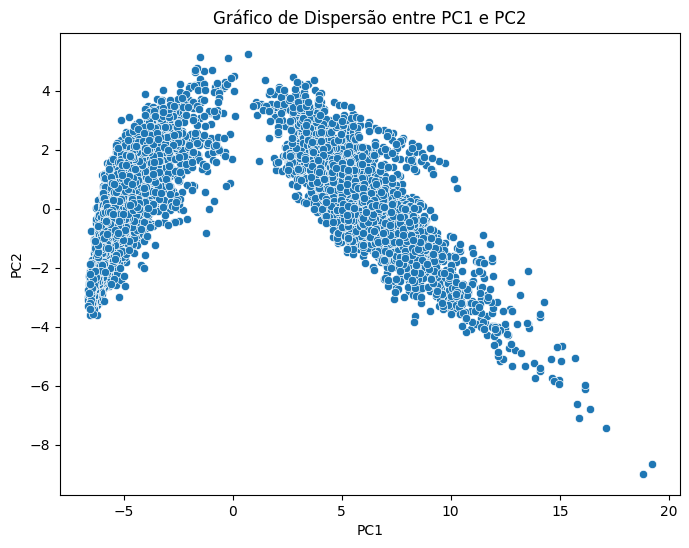

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])  # PC1 no eixo x, PC3 no eixo y
plt.title('Gráfico de Dispersão entre PC1 e PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

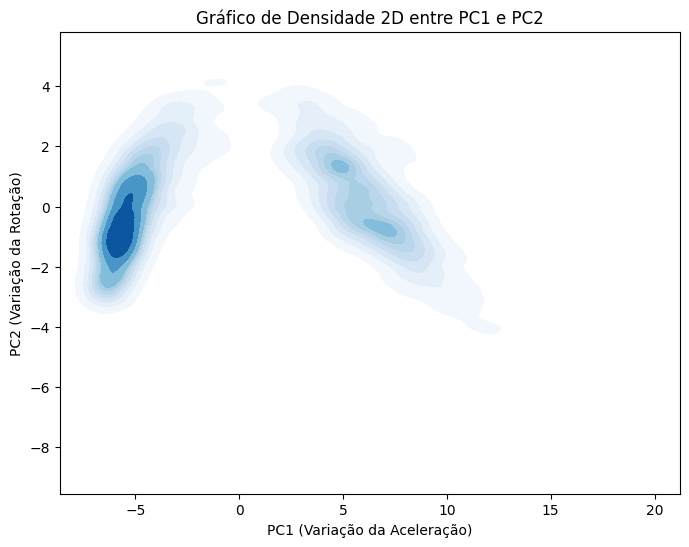

In [90]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], cmap="Blues", fill=True, bw_adjust=.5)  # PC1 no eixo x, PC3 no eixo y
plt.title('Gráfico de Densidade 2D entre PC1 e PC2')
plt.xlabel('PC1 (Variação da Aceleração)')
plt.ylabel('PC2 (Variação da Rotação)')
plt.show()

## 🤖 Implementação do Algoritmo de K-means

▶️ **Passo 1:** Escolha do número de Clusters (K)

O número de clusters é crucial para desempenho da análise dos clusters. Para obter o melhor valor de K vamos usar dois métodos:
- **Método do Cotovelo (Elbow Method)** - Encontrar o valor de K onde a inércia (soma das distâncias quadradas das amostras ao centro do cluster mais próximo) começa a diminuir a uma taxa menor, formando um "cotovelo" no gráfico.

- **Silhouette Score** - Avaliar a qualidade dos clusters, medindo a distância média entre cada amostra e as amostras do mesmo cluster (coesão) em comparação com a distância média entre cada amostra e as amostras do cluster mais próximo (separação).

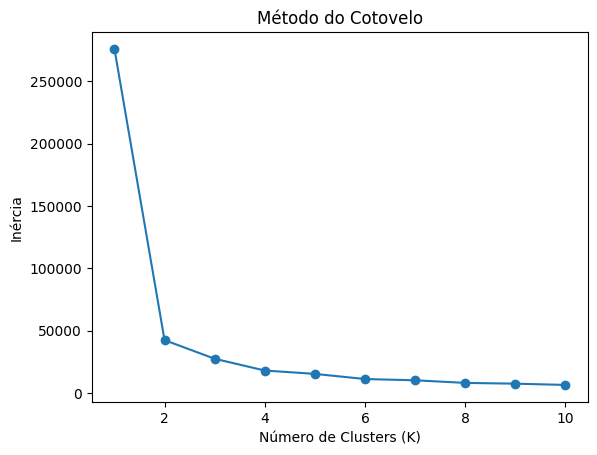

In [91]:
inercia = []
k_values = range(1, 11) # k variando de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca) # aplicando k-means
    inercia.append(kmeans.inertia_) # guardando a inercia para k

plt.plot(k_values, inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

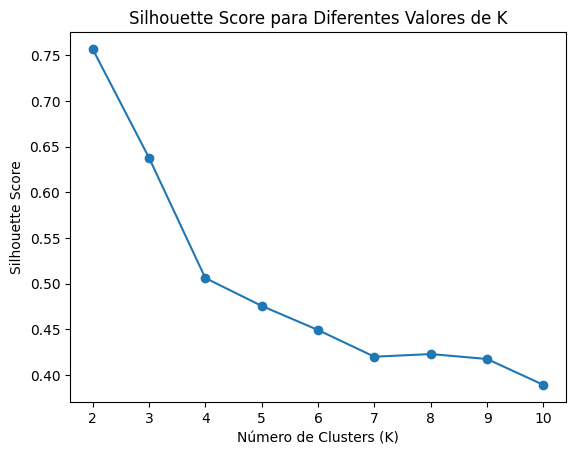

In [92]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Silhouette score não é definido para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)  # Obtenha os rótulos dos clusters
    silhouette_scores.append(silhouette_score(X_train_pca, cluster_labels))

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Valores de K')
plt.show()

▶ O Elbow Method sugere um valor de K em torno de 3 ou 4 (considerando a sutileza do cotovelo).

▶ Enquanto o Silhouette Score sugere um valor de K em torno de 2, mas há pouca variação entre 2 e 4, mantendo o score acima de 0.3.

▶ Considerando ambos os métodos, um valor de K entre 2 e 4 parece ser uma escolha razoável para o conjunto de dados.

▶ Usaremos k=2, k=3, k=4 e k=6 (rótulos pre-definidos).

▶️ **Passo 2:** Separar Clusters com o melhor K

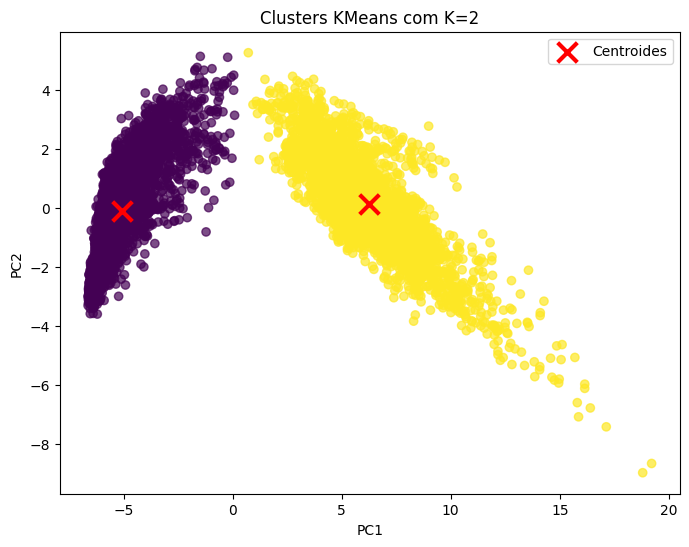

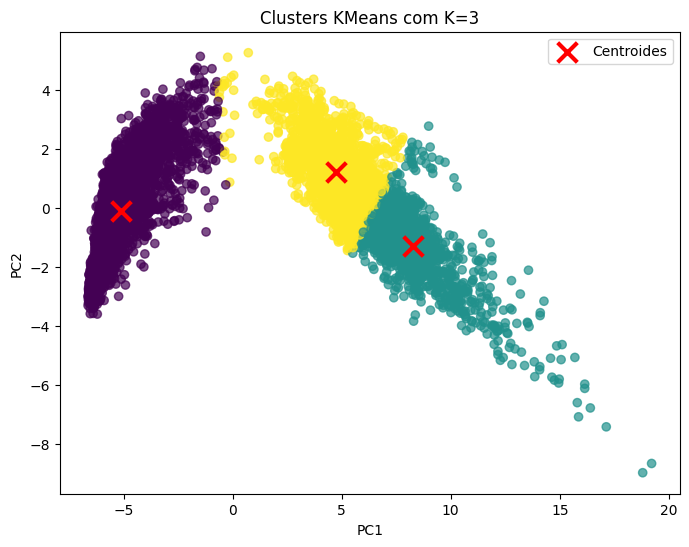

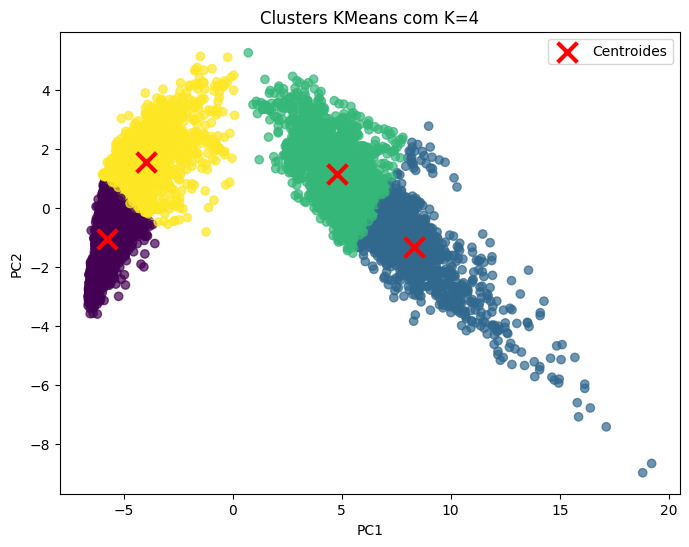

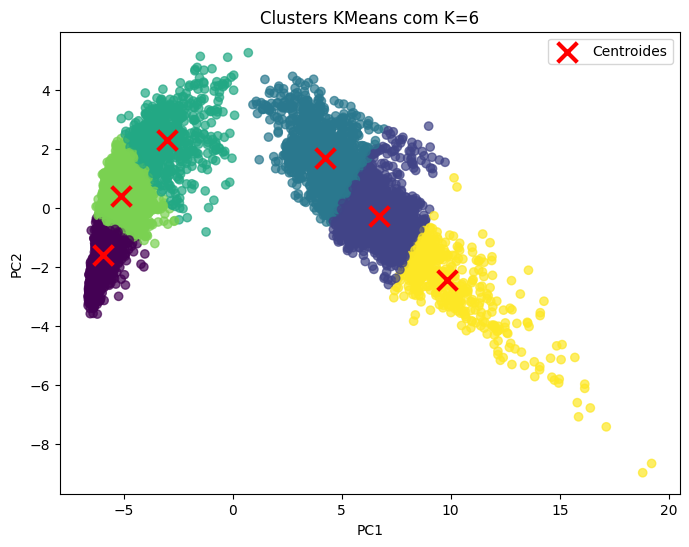

In [103]:
# Lista de valores de K
k_values = [2, 3, 4, 6]

# Loop para cada valor de K
for k in k_values:
    # Criar e treinar o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)

    # Obter os labels dos clusters
    labels = kmeans.labels_

    # Obter as coordenadas dos centroides
    centroids = kmeans.cluster_centers_

    # Plotar os dados com os clusters e centroides
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroides')
    plt.title(f'Clusters KMeans com K={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

## 📉 Análises e Resultados

###1. Silhouette Score

Silhouette Score mede a qualidade dos clusters, avaliando a coesão e a separação entre eles. Ele varia de -1 a 1, onde valores mais próximos de 1 indicam clusters bem definidos e separados.

In [119]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels)
    print(f"Silhouette Score para K={k}: {score:.3f}")

Silhouette Score para K=2: 0.757
Silhouette Score para K=3: 0.638
Silhouette Score para K=4: 0.506
Silhouette Score para K=6: 0.449


### 2. Inércia
A inércia mede a soma das distâncias quadradas das amostras ao centro do cluster mais próximo. Valores menores de inércia indicam clusters mais compactos.

In [106]:
# Calcular a inércia para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia = kmeans.inertia_
    print(f"Inércia para K={k}: {inertia:.2f}")

Inércia para K=2: 42309.81
Inércia para K=3: 27331.16
Inércia para K=4: 17891.63
Inércia para K=6: 11057.46


### 3. Diferença das médias das faeatures

Comparar as médias das features de cada cluster com as features originais do dataset. Isso pode ajudar a identificar quais features são mais importantes para a formação dos clusters e quais atividades eles representam.





In [107]:
# Escolher o valor de K para a interpretação (ex: K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_train_pca)

# Criar um DataFrame com os dados originais e os labels dos clusters
clustered_data = pd.DataFrame(X_train)
clustered_data['cluster'] = labels

# Calcular a média das features para cada cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Exibir as médias das features para cada cluster
print(cluster_means)

         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster                                                            
0                 0.276204          -0.015957          -0.107512   
1                 0.283222          -0.018239          -0.110281   
2                 0.264662          -0.020933          -0.111725   

         tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster                                                         
0               -0.978456         -0.942378         -0.946563   
1                0.030324          0.149761         -0.101795   
2               -0.281827         -0.083266         -0.251284   

         tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
cluster                                                         
0               -0.980615         -0.943141         -0.945048   
1               -0.027645          0.092188         -0.121987   
2               -0.331185         -0.101213         -0.245316   

       

In [108]:
# Calcular as médias das features originais
original_means = X_train.mean()

# Comparar as médias dos clusters com as médias originais
cluster_diff = cluster_means - original_means

# Exibir as diferenças entre as médias dos clusters e as médias originais
print(cluster_diff)

         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster                                                            
0                 0.001716           0.001738           0.001629   
1                 0.008734          -0.000543          -0.001140   
2                -0.009826          -0.003238          -0.002584   

         tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster                                                         
0               -0.373017         -0.431441         -0.341810   
1                0.635763          0.660698          0.502959   
2                0.323612          0.427672          0.353469   

         tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
cluster                                                         
0               -0.350103         -0.416234         -0.338898   
1                0.602867          0.619095          0.484163   
2                0.299327          0.425695          0.360835   

       

As features com grandes diferenças (positivas ou negativas) entre as médias dos clusters e as médias originais são importantes para a formação dos clusters. Essas features indicam que os clusters têm valores distintos para essas features, o que os diferencia uns dos outros.

### 4. Usando o modelo em dados não vistos

No caso do K-means, como ele é um algoritmo de aprendizado não supervisionado, o uso de dados de treino e teste não é tão crucial quanto em algoritmos supervisionados.

Ainda assim, essa sessão é para testar e aplicar o modelo treinado em dados de teste para verificar se os clusters encontrados são semelhantes aos encontrados nos dados de treino e comparar com os rótulos (y_test).

Isso indica se o modelo é robusto e se os clusters são representativos dos dados como um todo.

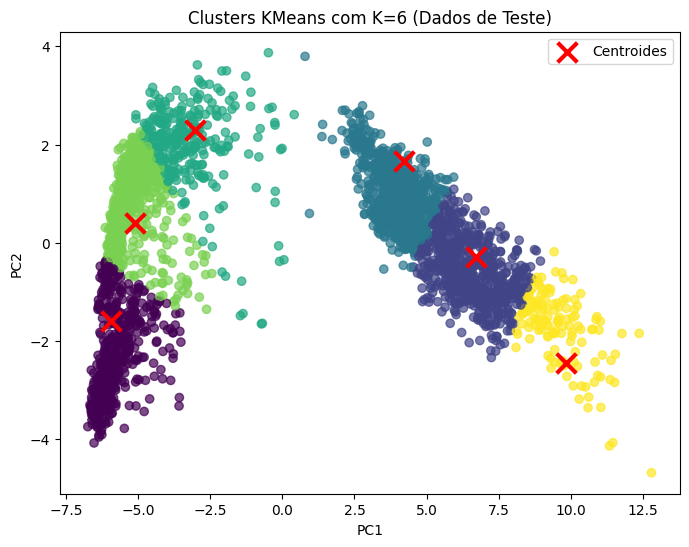

Silhouette Score para K=6 (Dados de Teste): 0.476
Inércia para K=6 (Dados de Teste): 11057.46


In [122]:
k = 6 # Utilizar as 6 AVDs pre definidas

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_pca)  # Treinar o modelo com os dados de treino
labels = kmeans.predict(X_test_pca)  # Prever os clusters nos dados de teste

# Plotar os clusters dos dados de teste
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroides')
plt.title(f'Clusters KMeans com K={k} (Dados de Teste)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Calcular o Silhouette Score para os dados de teste
silhouette_avg = silhouette_score(X_test_pca, labels)
print(f"Silhouette Score para K={k} (Dados de Teste): {silhouette_avg:.3f}")

# Calcular a inércia para os dados de teste
inertia = kmeans.inertia_  # A inércia é calculada durante o treinamento do modelo
print(f"Inércia para K={k} (Dados de Teste): {inertia:.2f}")

Embora, a comparação direta entre os clusters previstos e os rótulos reais pode não seja a forma mais adequada de avaliar o desempenho, vamos fazer isso e depois usar algumas métricas para ter uma ideia de quão bem o modelo agrupou os dados em relação aos rótulos reais.

Como o KMeans atribui labels arbitrários aos clusters (0, 1, 2, ...), precisamos ajustá-los para que correspondam aos rótulos reais em y_test. Faremos isso usando o adjusted_rand_score:

In [123]:
from sklearn.metrics import adjusted_rand_score

# Mapear os labels dos clusters para os rótulos reais
def map_cluster_labels(cluster_labels, true_labels):
    """Mapeia os labels dos clusters para os rótulos reais usando adjusted_rand_score."""
    from collections import Counter

    cluster_mapping = {}
    for cluster_id in set(cluster_labels):
        # Encontrar o rótulo real mais frequente no cluster
        most_common_label = Counter(true_labels[cluster_labels == cluster_id]).most_common(1)[0][0]
        cluster_mapping[cluster_id] = most_common_label

    # Mapear os labels dos clusters para os rótulos reais
    mapped_labels = [cluster_mapping[label] for label in cluster_labels]
    return mapped_labels

# Carregar y_test
y_test = pd.read_csv('UCI_HAR_Dataset/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)
y_test = y_test.values.ravel()  # Converter para um array 1D

# Mapear os labels dos clusters para os rótulos reais
mapped_labels = map_cluster_labels(labels, y_test)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular a acurácia
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Acurácia: {accuracy:.3f}")

# Calcular a precisão, recall e F1-score (média ponderada)
precision = precision_score(y_test, mapped_labels, average='weighted', zero_division=1)
recall = recall_score(y_test, mapped_labels, average='weighted', zero_division=1)
f1 = f1_score(y_test, mapped_labels, average='weighted', zero_division=1)

print(f"Precisão: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Adjusted Rand Score
ars = adjusted_rand_score(y_test, labels)
print(f"Adjusted Rand Score: {ars:.3f}")

Acurácia: 0.579
Precisão: 0.689
Recall: 0.579
F1-Score: 0.514
Adjusted Rand Score: 0.402


## 🔧 Otimização e Ajustes

### ⏩ 1. Normalização dos dados

O `StandardScaler` é recomendado para o K-means, pois ele garante que todas as features tenham a mesma influência no cálculo da distância, o que é importante para a formação dos clusters.

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajustar o scaler aos dados de treinamento e transformá-los:
X_train_scaled = scaler.fit_transform(X_train)
# Transformar os dados de teste usando o mesmo scaler
X_test_scaled = scaler.transform(X_test)

### ⏩ 2. Seleção de features e redução de dimensionalidade PCA

`SelectKBest` seleciona as k melhores features com base em uma função de pontuação. Informação Mútua é uma função de pontuação que mede a dependência entre duas variáveis. No contexto de seleção de features, ela mede a dependência entre cada feature e a variável alvo (no caso do K-means, os clusters).

In [110]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Carregar os rótulos reais
y_train = pd.read_csv('UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

# Criar um objeto SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=10) # 10 features

# Ajustar o seletor aos dados de treinamento e transformá-los
X_train_selected = selector.fit_transform(X_train_scaled, y_train.values.ravel())
# Transformar os dados de teste usando o mesmo seletor
X_test_selected = selector.transform(X_test_scaled)

In [111]:
# Criar um objeto PCA com 2 componentes
pca = PCA(n_components=2)

# Ajustar o PCA aos dados de treinamento transformados e aplicar a transformação
X_train_selected_pca = pca.fit_transform(X_train_selected)

# Aplicar a mesma transformação aos dados de teste
X_test_selected_pca = pca.transform(X_test_selected)


## 🤖 KMeans após Otimização

Agora, vamos rodar o K-means após as otimizações e utilizar o método de inicialização `K-means++` para garantir uma escolha inicial eficaz dos centroids, o que ajuda a otimizar o tempo de convergência do modelo.

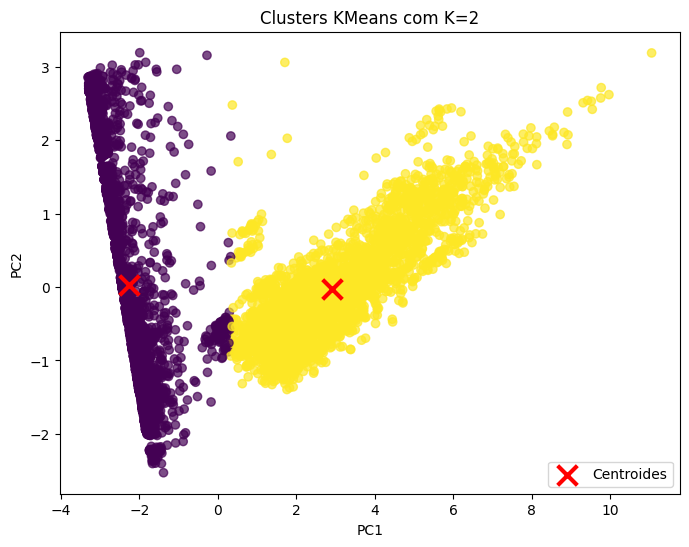

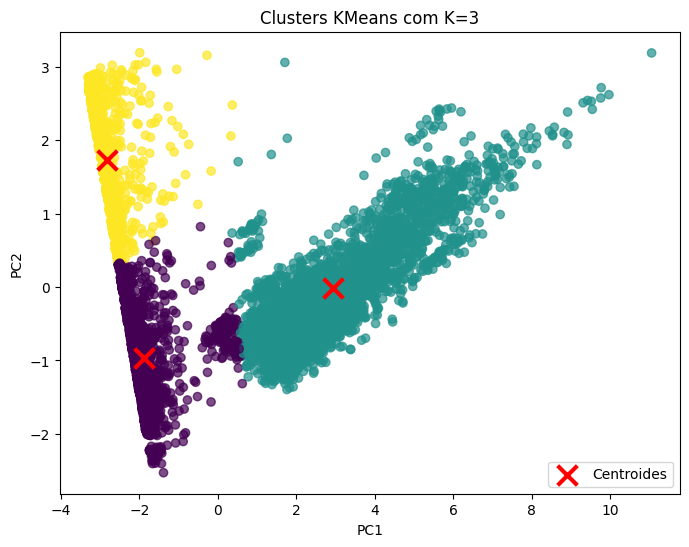

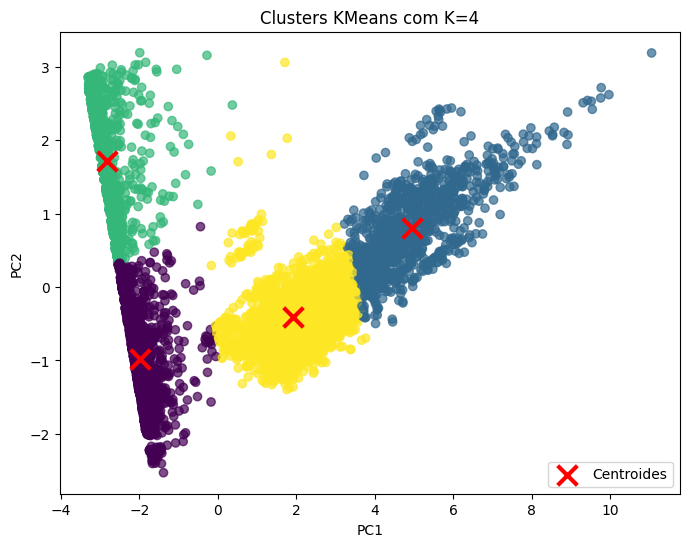

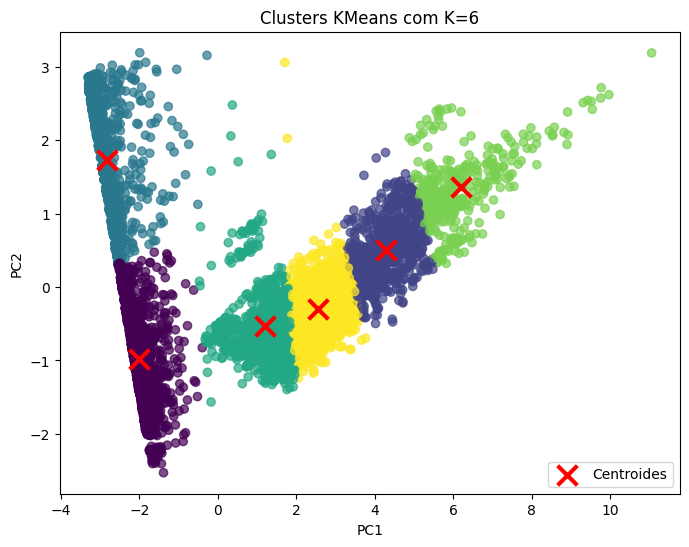

In [130]:
# Loop para cada valor de K [2,3,4,6]
for k in k_values:
  # Criar e treinar o modelo KMeans
  kmeans_later = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans_later.fit(X_train_selected_pca)

  # Obter os labels dos clusters
  labels_later = kmeans_later.labels_

  # Obter as coordenadas dos centroides
  centroids_later = kmeans_later.cluster_centers_

  # Plotar os dados com os clusters e centroides
  plt.figure(figsize=(8, 6))
  plt.scatter(X_train_selected_pca[:, 0], X_train_selected_pca[:, 1], c=labels_later, cmap='viridis', alpha=0.7)
  plt.scatter(centroids_later[:, 0], centroids_later[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroides')
  plt.title(f'Clusters KMeans com K={k}')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend()
  plt.show()

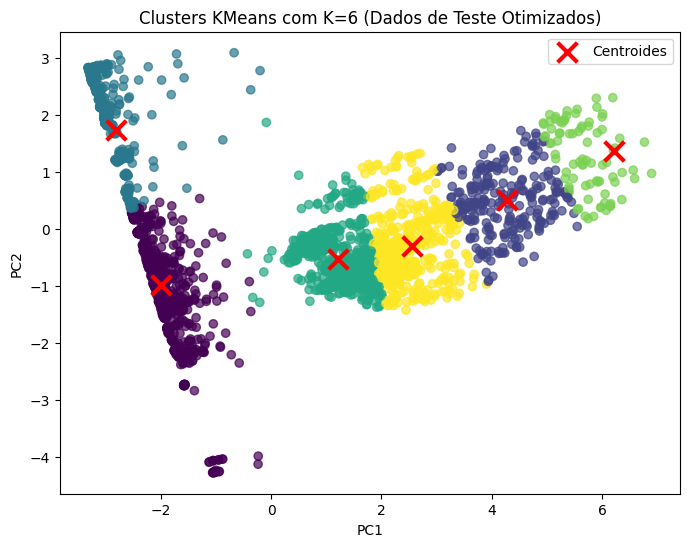

Silhouette Score para K=6 (Dados de Teste): 0.517
Inércia (Otimizado): 3776.14
Acurácia (Otimizado): 0.598
Precisão (Otimizado): 0.691
Recall (Otimizado): 0.598
F1-Score (Otimizado): 0.545
Adjusted Rand Score (Otimizado): 0.447


In [131]:
k = 6 # Utilizar as 6 AVDs pre definidas

kmeans_later = KMeans(n_clusters=k, init='k-means++' ,random_state=42)
kmeans_later.fit(X_train_selected_pca)  # Treinar o modelo com os dados de treino otimizados
labels_later = kmeans_later.predict(X_test_selected_pca)  # Prever os clusters nos dados de teste otimizados

# Mapear os labels dos clusters para os rótulos reais (usando y_test)
mapped_labels_later = map_cluster_labels(labels_later, y_test)

# Visualizar os clusters (usando X_test_selected_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_selected_pca[:, 0], X_test_selected_pca[:, 1], c=labels_later, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_later.cluster_centers_[:, 0], kmeans_later.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroides')
plt.title(f'Clusters KMeans com K={k} (Dados de Teste Otimizados)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Calcular o Silhouette Score para os dados de teste otimizados
silhouette_later = silhouette_score(X_test_selected_pca, labels_later)
print(f"Silhouette Score para K={k} (Dados de Teste): {silhouette_later:.3f}")
# Calcular a inércia (usando kmeans_later)
inertia_later = kmeans_later.inertia_
print(f"Inércia (Otimizado): {inertia_later:.2f}")

# Calcular as métricas de avaliação (usando mapped_labels_later e y_test)
accuracy_later = accuracy_score(y_test, mapped_labels_later)
precision_later = precision_score(y_test, mapped_labels_later, average='weighted', zero_division=1)
recall_later = recall_score(y_test, mapped_labels_later, average='weighted', zero_division=1)
f1_later = f1_score(y_test, mapped_labels_later, average='weighted', zero_division=1)
ars_later = adjusted_rand_score(y_test, labels_later)

print(f"Acurácia (Otimizado): {accuracy_later:.3f}")
print(f"Precisão (Otimizado): {precision_later:.3f}")
print(f"Recall (Otimizado): {recall_later:.3f}")
print(f"F1-Score (Otimizado): {f1_later:.3f}")
print(f"Adjusted Rand Score (Otimizado): {ars_later:.3f}")


## 📈 Resultados e Análises após otimizações

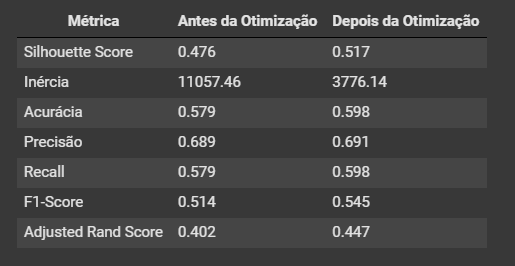


1. Melhora na qualidade dos clusters:

  - O Silhouette Score aumentou de 0.476 para 0.517 após as otimizações, indicando uma melhora na qualidade dos clusters, com melhor separação e coesão entre eles.
  - A inércia diminuiu significativamente de 11057.46 para 3776.14, mostrando que os clusters estão mais compactos e os pontos estão mais próximos de seus centroides.

2. Melhora no desempenho preditivo:

  - A acurácia, recall e F1-Score também apresentaram melhoras moderadas após as otimizações, indicando que o modelo está classificando as atividades com um pouco mais de precisão.
  - O Adjusted Rand Score aumentou de 0.402 para 0.447, confirmando a melhora na concordância entre os clusters previstos e os rótulos reais.

3. Impacto das otimizações:

  - As otimizações (normalização, seleção de features, PCA e K-means++) tiveram um impacto positivo no desempenho do modelo KMeans.
  - A normalização e a seleção de features provavelmente ajudaram a reduzir o ruído e a redundância nos dados, enquanto o PCA facilitou a visualização e o agrupamento dos dados em um espaço de menor dimensão.
  - O K-means++ contribuiu para uma inicialização mais eficiente dos centroides, levando a uma convergência mais rápida e a melhores resultados.